# Descripción del proyecto 

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

# Inicialización

In [7]:

#carguemos las liberias que vamos a necesitar
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns


# Carga de datos

In [8]:
data = pd.read_csv('./Churn.csv')

# Revisión de datos 

In [9]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2194,2195,15710161,Ko,850,France,Female,34,2.0,0.00,2,1,1,171706.66,0
6240,6241,15626507,Chukwubuikem,558,France,Male,27,NaN,152283.39,1,1,0,183271.15,0
2852,2853,15771483,Arnold,609,France,Male,40,6.0,0.00,2,1,1,97416.34,0
5817,5818,15656865,Gray,613,Germany,Male,69,9.0,78778.49,1,0,1,8751.59,0
7013,7014,15599440,McGregor,748,France,Female,34,NaN,0.00,2,1,0,53584.03,0
4410,4411,15691871,Millar,503,Germany,Male,42,9.0,153279.39,1,1,1,151336.96,0
4636,4637,15630709,Castiglione,619,Germany,Female,31,2.0,56116.30,2,0,0,2181.94,0
566,567,15651674,Billson,438,Spain,Female,54,NaN,0.00,1,0,0,191763.07,1
3093,3094,15667742,Vincent,627,Spain,Male,41,5.0,100880.76,1,0,1,134665.25,0
1920,1921,15723720,McKenzie,591,France,Female,31,7.0,0.00,2,0,1,48778.46,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


el tipo de datos parece correcto.

<Axes: xlabel='Tenure'>

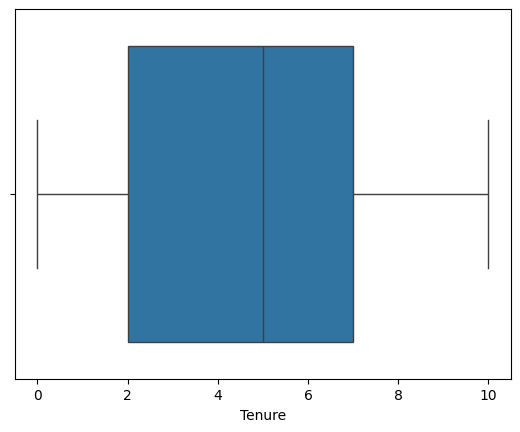

In [11]:
sns.boxplot(x=data['Tenure'])

In [12]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Tenemos datos ausentes en la columna Tenure que hay que corregir. 

In [13]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

observamos que cerca de la mitad de las personas residen en Francia y el resto está dividido entre Alemania y España. 

In [15]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Vemos que en nuestra variable objetivo existe una disparidad (desbalanceo) en los datos, 1/3 de los datos son positivos(se fueron del banco) y 2/3 son negativos(aún permanecen en el banco)

# Reparación de datos

In [16]:
#vamos a llenar los datos ausentes de tenure con la media 
ten_mean = data['Tenure'].mean()
data['Tenure'].fillna(ten_mean, inplace=True)
data.isna().sum()


/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_29596/4179817504.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tenure'].fillna(ten_mean, inplace=True)


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Codificación de datos 

In [17]:
#Creamos nuestro objetivos y las caracteristicas y codifiquemos nuestros datos 
target = data['Exited']
#En este caso los valores 'Exited', 'Surname', 'RowNumber' y 'CustomerId' NO nos sirven porque no aportan valor al modelo. Vamos a eliminarlos de nuestras caracteristicas 
features = data.drop(columns=['Exited','Surname','RowNumber','CustomerId'])
featurs_one = pd.get_dummies(features, drop_first=True)

In [18]:
#Comprobemos que todo esté en orden
featurs_one.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3490,453,29,4.99769,0.00,1,0,0,198376.02,False,False,True
1738,796,41,8.00000,107525.07,1,1,0,18510.41,False,True,True
7016,741,50,1.00000,78737.61,1,1,1,13018.96,False,True,True
8665,821,40,1.00000,0.00,2,1,0,194273.12,False,False,False
1140,618,37,5.00000,96652.86,1,1,0,98686.40,False,False,False
9590,772,34,7.00000,111565.91,1,1,1,121073.23,True,False,True
394,594,24,0.00000,97378.54,1,1,1,71405.17,False,True,False
3415,578,40,4.99769,63609.92,1,0,0,74965.61,False,True,True
1607,711,64,4.00000,0.00,2,1,1,3185.67,False,False,True
6529,836,37,4.99769,0.00,2,1,0,111324.41,False,True,False


# Estandarización de datos  

In [19]:
#Antes de entrenar nuestro modelo vamos a divir los datos en prueba y validación y a estandarizarlos.
#Primer dividamos los datos para entrenamiento y validación 
features_train, features_valid,target_train,target_valid = train_test_split(featurs_one, target, random_state=123, test_size=0.25)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(7500, 11)
(7500,)
(2500, 11)
(2500,)


In [20]:
#estandaricemos nuestros datos con un modelo 
#Guardemos solo las variables que vamos a estandarizar
varias = ['CreditScore','Age','Tenure','Balance','EstimatedSalary',] 

#estandaricemos
scaler = StandardScaler()
scaler.fit(features_train[varias])

features_train[varias] = scaler.transform(features_train[varias])
features_valid[varias] = scaler.transform(features_valid[varias])

In [21]:
print(features_train.sample(10))

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9069    -0.320385 -0.651268 -0.359676  1.578078              2          1   
6625     0.072786  0.200087  0.365733  0.570314              1          1   
5049     1.386808 -0.083698  1.816552  0.731915              1          0   
4765    -0.206572  0.956847 -1.447791 -1.215055              2          0   
6101     1.893792 -0.651268  0.365733 -1.215055              1          1   
624     -1.789606  0.862252 -1.085086  0.841037              1          0   
9377    -0.682517 -1.218837 -1.810495  1.114379              1          1   
3462    -2.296591  2.186582 -1.447791  0.500511              1          0   
1517     0.972943  1.429822  0.365733  0.278698              2          0   
640      1.055716  0.862252  0.003029  0.633063              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9069               1         1.267628              False             True  

Ya hemos dividido nuestros datos, quitado columnas que no necesitamos y estandarizamos los datos. Por ahora no vamos a lidiar con el desbalance de los datos.  Creemos nuestros modelos 

# Modelos en desbalance

### Regresión Logística con desbalanceo

In [22]:
#Hagamos un modelo de regresión logística con los datos como los tenemos
l_model = LogisticRegression(random_state=123, solver='liblinear')
l_model.fit(features_train,target_train)
l_pred = l_model.predict(features_valid)
ac_score = l_model.score(features_valid,target_valid)
l_f1_score= f1_score(target_valid,l_pred)

print('La exactitud del modelo es de:', ac_score)
print('El f1 Score del modelo es de :',l_f1_score)

La exactitud del modelo es de: 0.8132
El f1 Score del modelo es de : 0.3338088445078459


In [23]:
print(confusion_matrix(target_valid,l_pred))

[[1916   67]
 [ 400  117]]


In [24]:
print(classification_report(target_valid,l_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1983
           1       0.64      0.23      0.33       517

    accuracy                           0.81      2500
   macro avg       0.73      0.60      0.61      2500
weighted avg       0.79      0.81      0.78      2500



Podemos observar que para el caso de nuestro modelo de Regresión logística sin balancear tenemos una precisión de 0.64, un recall de 0.23 y un f1-score de 0.33 

### Bsoque Aleatorio con desbalanceo

In [25]:
#Ahora creamos un modelo de bosque aleatorio y encontremo la mejor configuración 
r_best_f1 = 0
r_best_est = 0
for est in range(1, 100):
    r_model = RandomForestClassifier(random_state=123, n_estimators=est)
    r_model.fit(features_train,target_train)
    r_pred = r_model.predict(features_valid)
    r_f1 = f1_score(target_valid,r_pred)
    if r_f1 > r_best_f1:
        r_best_f1 = r_f1
        r_best_est = est

print(f'El mejor modelo tiene n_estimators={r_best_est} y un score f1 de: {r_best_f1}')

El mejor modelo tiene n_estimators=17 y un score f1 de: 0.6011428571428571


In [26]:
print(confusion_matrix(target_valid,r_pred))

[[1907   76]
 [ 272  245]]


In [27]:
print(classification_report(target_valid,r_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1983
           1       0.76      0.47      0.58       517

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



Podemos observar que aunque el modelo tenga una exactitud alta , el valor que nos interesa (F1) sigue siendo bajo, En el caso de la regresión no llega a la metrica que estamos buscando (0.59) y para el caso del arból de desición apenas pasa el umbral que tenemos. 

En un principio observamos que las clases están desbalanceados y podemos suponer que es por eso que el modelo arroja estos resultados. Ahora vamos a balancear las clases y probar mejorar el modelo. 

# Correción del Desbalanceo (Sobremuestreo)

### Sobremuestreo

In [28]:
#Vamos a probar primero con un sobremuestreo 
#Dividamos el conjunto en observaciones negativas y positivas 
features_zero = features_train[target_train == 0]
features_one = features_train[target_train == 1]
target_zero = target_train[target_train == 0]
target_one = target_train[target_train == 1]

#Dupliquemos las observaciones positivas
feat_upsample = pd.concat([features_zero] + [features_one] * 3)
targ_unsample = pd.concat([target_zero] + [target_one] * 3)

feat_upsample, targ_unsample = shuffle(feat_upsample, targ_unsample, random_state=123)

### Prueba con Modelo de Regresión y sobremuestreo

In [29]:
#Probemos con un modelo de Regresión 
md = LogisticRegression(random_state=123, solver='liblinear')
md.fit(feat_upsample,targ_unsample)
pred_val = md.predict(features_valid)
f1_regression = f1_score(target_valid,pred_val)

print('El modelo predice f1 como:', f1_regression)

El modelo predice f1 como: 0.5069958847736625


In [30]:
print(confusion_matrix(target_valid, pred_val))

[[1593  390]
 [ 209  308]]


In [31]:
print(classification_report(target_valid, pred_val))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1983
           1       0.44      0.60      0.51       517

    accuracy                           0.76      2500
   macro avg       0.66      0.70      0.67      2500
weighted avg       0.79      0.76      0.77      2500



In [32]:
probal_val = md.predict_proba(features_valid)
probal_one_val = probal_val[:, 1]

auc_roc_md = roc_auc_score(target_valid, probal_one_val)

print('El valor AUC- ROC para el modelo de Regresión con sobremuestreo es:', auc_roc_md)

El valor AUC- ROC para el modelo de Regresión con sobremuestreo es: 0.7802657209101345


Podemos observar que una vez que balanceamos nuestros datos con un sobremuestreo, el modelo de regresíon logística mejora. Baja la presición un poco de 0.64 a 0.44, sube el Recallde 0.23 a 0.6 y el F1 pasa de 0,33 a 0.51. En general es una buena mejora de nuestro modelo, pero sigue sin ser óptima y no alcanza el mínimo requerido.  

### Prueba con Bosque Aleatorio y sobremuestreo

In [33]:
#entrenamos nuestro modelo y busquemos la mejor configuración para nuestro arbol de decisión
bst_f1 = 0
bst_est = 0
for lest in range(1, 100):
    t_m = RandomForestClassifier(random_state=123, n_estimators=lest)
    t_m.fit(feat_upsample,targ_unsample)
    t_pred = t_m.predict(features_valid)
    t_f1 = f1_score(target_valid,t_pred)
    if t_f1 > bst_f1:
        bst_f1 = t_f1
        bst_est = lest

print(f'El mejor modelo tiene n_estimators={bst_est} y un score f1 de: {bst_f1}')

El mejor modelo tiene n_estimators=71 y un score f1 de: 0.6147278548559232


In [34]:
print(confusion_matrix(target_valid, t_pred))

[[1850  133]
 [ 234  283]]


In [35]:
print(classification_report(target_valid, t_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1983
           1       0.68      0.55      0.61       517

    accuracy                           0.85      2500
   macro avg       0.78      0.74      0.76      2500
weighted avg       0.84      0.85      0.85      2500



In [36]:
# Calculemos el valor AUC -ROC de nuestro modelo 
proba_t_m = t_m.predict_proba(features_valid)
proba_one_t_m = proba_t_m[:, 1]

auc_roc_t_m = roc_auc_score(target_valid, proba_one_t_m)

print('El valor AUC- ROC para el modelo de Arbol de decisión con sobremuestreo es:', auc_roc_t_m)

El valor AUC- ROC para el modelo de Arbol de decisión con sobremuestreo es: 0.8541036918253901


En nuestro modelo de arbol de desición despues del balanceo por sobremuestreo podemos observar que la presición disminuye de 0.76 a 0.78 y aumenta nuestro Recall de 0.47 a 0.55. El F1 score sube un poco pasando de 0.58 a 0.61, lo cual nos indica que nuestro modelo está mejorando pero no es significativo el aumento. En este caso, nuestro modelo si alcanza el umbral de 0.59. 

# Correción del Desbalanceo (Submuestreo)

In [37]:
# Ahora veamos si mejor con un submuestreo 
#Dividamos el conjunto en observaciones negativas y positivas 
feat_zero = features_train[target_train == 0]
feat_one = features_train[target_train == 1]
targ_zero = target_train[target_train == 0]
targ_one = target_train[target_train == 1]

#Tomemos una fracción de los datos para reducir las muestras con las  que entrenaremos el modelo
feat_downsample = pd.concat([feat_zero.sample(frac=0.3,random_state=123)] + [feat_one])
targ_downsample = pd.concat([targ_zero.sample(frac=0.3,random_state=123)] + [targ_one])

#barajemos los datos
feat_downsample, targ_downsample = shuffle(feat_downsample, targ_downsample, random_state=123)

print(feat_downsample.shape)
print(targ_downsample.shape)

(3314, 11)
(3314,)


### Modelo de Regresión logistica con submuestreo 

In [38]:
m1 = LogisticRegression(random_state=123, solver='liblinear')
m1.fit(feat_downsample,targ_downsample)
m1_pred = m1.predict(features_valid)
m1_f1 = f1_score(target_valid,m1_pred)

print('El modelo predice f1 como:', m1_f1)

El modelo predice f1 como: 0.5098934550989346


In [39]:
print(confusion_matrix(target_valid, m1_pred))

[[1521  462]
 [ 182  335]]


In [40]:
print(classification_report(target_valid, m1_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1983
           1       0.42      0.65      0.51       517

    accuracy                           0.74      2500
   macro avg       0.66      0.71      0.67      2500
weighted avg       0.80      0.74      0.76      2500



In [41]:
proba_val = m1.predict_proba(features_valid)
proba_one_val = proba_val[:, 1]

auc_roc_m1 = roc_auc_score(target_valid, proba_one_val)

print('El valor AUC- ROC para el modelo de Regresión con submuestreo es:', auc_roc_m1)

El valor AUC- ROC para el modelo de Regresión con submuestreo es: 0.782542325433496


Podemos observar que nuestro modelo de regresión logística con submuestreo es un poco mejor que con sobremuestreo. Pero no cumple con el minimo de 0.59 necesario 

### Modelo de Bosque Aleatorio con submuestreo 

In [42]:
f1_best = 0
est_best = 0
for iest in range(1, 100):
    tmr = RandomForestClassifier(random_state=123, n_estimators=iest)
    tmr.fit(feat_downsample,targ_downsample)
    tmr_pred = tmr.predict(features_valid)
    tmr_f1 = f1_score(target_valid,tmr_pred)
    if tmr_f1 > f1_best:
        f1_best = tmr_f1
        est_best = iest

print(f'El mejor modelo tiene n_estimators={est_best} y un score f1 de: {f1_best}')

El mejor modelo tiene n_estimators=60 y un score f1 de: 0.617124394184168


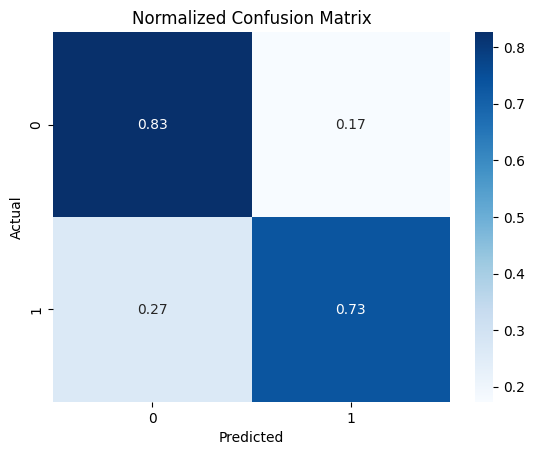

In [43]:
conf_matrix = confusion_matrix(target_valid, tmr_pred, normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [44]:
print(confusion_matrix(target_valid, tmr_pred))

[[1639  344]
 [ 138  379]]


In [45]:
print(classification_report(target_valid, tmr_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1983
           1       0.52      0.73      0.61       517

    accuracy                           0.81      2500
   macro avg       0.72      0.78      0.74      2500
weighted avg       0.84      0.81      0.82      2500



In [46]:
proba_tmr = tmr.predict_proba(features_valid)
proba_one_tmr = proba_tmr[:, 1]

auc_roc_tmr = roc_auc_score(target_valid, proba_one_tmr)

print('El valor AUC- ROC para el modelo de Arbol de decisión con submuestreo es:', auc_roc_tmr)

El valor AUC- ROC para el modelo de Arbol de decisión con submuestreo es: 0.8612168616996893


En definitiva , el Modelo de Bosque aleatorio con Submuestreo muestra ser el mejor de todos los que hemos probado con un valor F1 de 0.6171 y un valor AUC-ROC de 0.8612

## Curva ROC para nuestro mejor modelo (Bosque aleatorio con submuestreo)

Text(0.5, 1.0, 'Curva ROC')

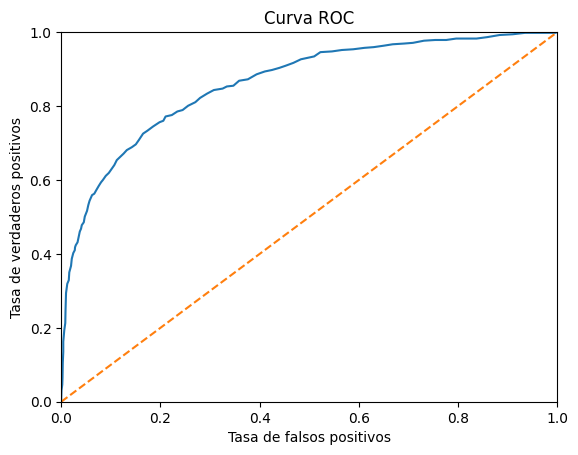

In [47]:
fpr, tpr, thresholds = roc_curve(target_valid, proba_one_tmr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')

In [48]:
#volvamos a sacar nuestro AUC-ROC de este modelo 

proba_tmr = tmr.predict_proba(features_valid)
proba_one_tmr = proba_tmr[:, 1]

auc_roc_tmr = roc_auc_score(target_valid, proba_one_tmr)

print('El valor AUC- ROC para nuestro mejor modelo (Arbol de decisión con submuestreo) es:', auc_roc_tmr)

El valor AUC- ROC para nuestro mejor modelo (Arbol de decisión con submuestreo) es: 0.8612168616996893


# Conclusiones 

Probamos 2 modelos: Bosque Aleatorio y Regresión logística. 

Los modelos los probamos en 3 escenarios. Con datos desbalanceados, con datos balanceados con un sobremuestreo y con datos balanceados con submuestreo. 

De los 3 escenarios el mejor escenario para nuestros modelos fue con datos balanceados con submuestreo y de los 2 modelos el que mejor rendimiento tuvo fue el de Bosque de desiciones. 

Nuestro mejor modelo obtuvo un valor F1 de 0.6171, una precisión de 0.52 y un Recall de 0.73. Lo que excede el umbral de f1 que fue puesto para este proyecto de 0.59.  Despues de calcular la curva ROC y obtener el valor AUC-ROC observamos que nuestro modelo tiene un valor AUR-ROC de 0.86 lo cual es un buen indicador para las predicciones de nuestro modelo en general. 
